# Taller Clase 5: Detección de Objetos - CNN Vanilla

Modelo: CNN simple sin backbone pre-entrenado - ENTRENAMIENTO COMPLETO

**Estructura del Taller**:
- 1. Descargar dataset y etiquetas en imágenes (x_top, y_top)
- 3. Modelo: Extractor de características + Cabeza (regresión de 4 variables)
- 4. Entrenamiento
    - 4.1 Visualizar resultados entrenamiento
- 5. Evaluación
- 6. Predicciones evaluación

**Características:**
- Arquitectura: CNN simple desde cero 
- Parámetros: ~15M (todos entrenables)
- Ventajas: Simple, fácil de entender, sin dependencias de modelos pre-entrenados
- Desventajas: Requiere más datos, entrenamiento más lento, menor rendimiento



In [5]:
# Importar las clases del módulo
from bounding_box_vanilla_cnn import (
    BoundingBoxDataset, 
    VanillaBoundingBoxRegressor, 
    WeightedMSELoss,
    load_dataset,
    train_model,
    plot_training_results,
    evaluate_model_detailed,
    print_evaluation_results,
    visualize_predictions
)

import torch
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Configuración del modelo CNN Vanilla OPTIMIZADO
MODEL_NAME = "Vanilla_CNN"
BATCH_SIZE = 16
LEARNING_RATE = 1e-4  # REDUCIDO para mejor convergencia
EPOCHS = 50  # Más épocas para entrenamiento completo
PATIENCE = 15  # Más paciencia para entrenamiento completo
MIN_DELTA = 1e-6  # Más sensible a mejoras

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"🖥️ Dispositivo: {device}")
print(f"📊 Configuración OPTIMIZADA:")
print(f"   - Modelo: {MODEL_NAME}")
print(f"   - Batch Size: {BATCH_SIZE}")
print(f"   - Learning Rate: {LEARNING_RATE}")
print(f"   - Épocas: {EPOCHS}")
print(f"   - Early Stopping: {PATIENCE} épocas")
print(f"   - ENTRENAMIENTO COMPLETO: Todos los parámetros se entrenan")


🖥️ Dispositivo: cpu
📊 Configuración OPTIMIZADA:
   - Modelo: Vanilla_CNN
   - Batch Size: 16
   - Learning Rate: 0.0001
   - Épocas: 50
   - Early Stopping: 15 épocas
   - ENTRENAMIENTO COMPLETO: Todos los parámetros se entrenan


## 1. Descargar dataset y etiquetas en imágenes (x_top, y_top)


In [6]:
# Cargar dataset
image_paths, annotation_paths = load_dataset()

# Transformaciones MEJORADAS
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Crear dataset
dataset = BoundingBoxDataset(image_paths, annotation_paths, transform=transform)

# Dividir dataset
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# Crear DataLoaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

print(f"📊 División del dataset:")
print(f"   - Entrenamiento: {len(train_dataset)} muestras")
print(f"   - Validación: {len(val_dataset)} muestras")


📁 Dataset cargado: 6209 muestras
📂 Categorías: 102
📊 División del dataset:
   - Entrenamiento: 4967 muestras
   - Validación: 1242 muestras


## 3. Modelo: Extractor de características + Cabeza (regresión de 4 variables)


In [7]:
# Crear modelo
model = VanillaBoundingBoxRegressor()
model = model.to(device)

# Contar parámetros
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"🤖 Modelo {MODEL_NAME}  creado:")
print(f"   - Parámetros totales: {total_params:,}")
print(f"   - Parámetros ENTRENABLES: {trainable_params:,}")
print(f"   - ENTRENAMIENTO COMPLETO: Todos los parámetros se entrenan")

# Configurar entrenamiento OPTIMIZADO
criterion = WeightedMSELoss()
optimizer = optim.AdamW(model.parameters(), lr=LEARNING_RATE, weight_decay=1e-4)  # AdamW con weight decay
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.7)  # StepLR más gradual

print(f"⚙️ Configuración de entrenamiento:")
print(f"   - Función de pérdida: WeightedMSE (pesos: {criterion.weights})")
print(f"   - Optimizador: AdamW (lr={LEARNING_RATE}, weight_decay=1e-4)")
print(f"   - Scheduler: StepLR (step_size=10, gamma=0.7)")
print(f"   - Entrena todos los: {trainable_params:,} parámetros")


🤖 Modelo Vanilla_CNN  creado:
   - Parámetros totales: 58,051,332
   - Parámetros ENTRENABLES: 58,051,332
   - ENTRENAMIENTO COMPLETO: Todos los parámetros se entrenan
⚙️ Configuración de entrenamiento:
   - Función de pérdida: WeightedMSE (pesos: tensor([1., 1., 1., 1.]))
   - Optimizador: AdamW (lr=0.0001, weight_decay=1e-4)
   - Scheduler: StepLR (step_size=10, gamma=0.7)
   - Entrena todos los: 58,051,332 parámetros


## 4. Entrenamiento


In [8]:
# Entrenar
train_losses, val_losses = train_model(
    model, train_loader, val_loader, criterion, optimizer, scheduler, 
    EPOCHS, device, patience=PATIENCE, min_delta=MIN_DELTA
)


🚀 Iniciando entrenamiento OPTIMIZADO de Vanilla_CNN por 50 épocas con early stopping (patience=15)
⚠️  Nota: CNN Vanilla requiere entrenamiento completo desde cero
Epoch   1/50 | Train Loss: 0.0649 | Val Loss: 0.0381 | LR: 1.00e-04 | Patience: 0/15
Epoch   2/50 | Train Loss: 0.0396 | Val Loss: 0.0372 | LR: 1.00e-04 | Patience: 0/15
Epoch   3/50 | Train Loss: 0.0371 | Val Loss: 0.0328 | LR: 1.00e-04 | Patience: 0/15
Epoch   4/50 | Train Loss: 0.0341 | Val Loss: 0.0337 | LR: 1.00e-04 | Patience: 1/15
Epoch   5/50 | Train Loss: 0.0318 | Val Loss: 0.0341 | LR: 1.00e-04 | Patience: 2/15
Epoch   6/50 | Train Loss: 0.0294 | Val Loss: 0.0345 | LR: 1.00e-04 | Patience: 3/15
Epoch   7/50 | Train Loss: 0.0268 | Val Loss: 0.0310 | LR: 1.00e-04 | Patience: 0/15
Epoch   8/50 | Train Loss: 0.0244 | Val Loss: 0.0305 | LR: 1.00e-04 | Patience: 0/15
Epoch   9/50 | Train Loss: 0.0223 | Val Loss: 0.0298 | LR: 1.00e-04 | Patience: 0/15
Epoch  10/50 | Train Loss: 0.0194 | Val Loss: 0.0352 | LR: 7.00e-05 | P

### 4.1 Visualizar resultados entrenamiento


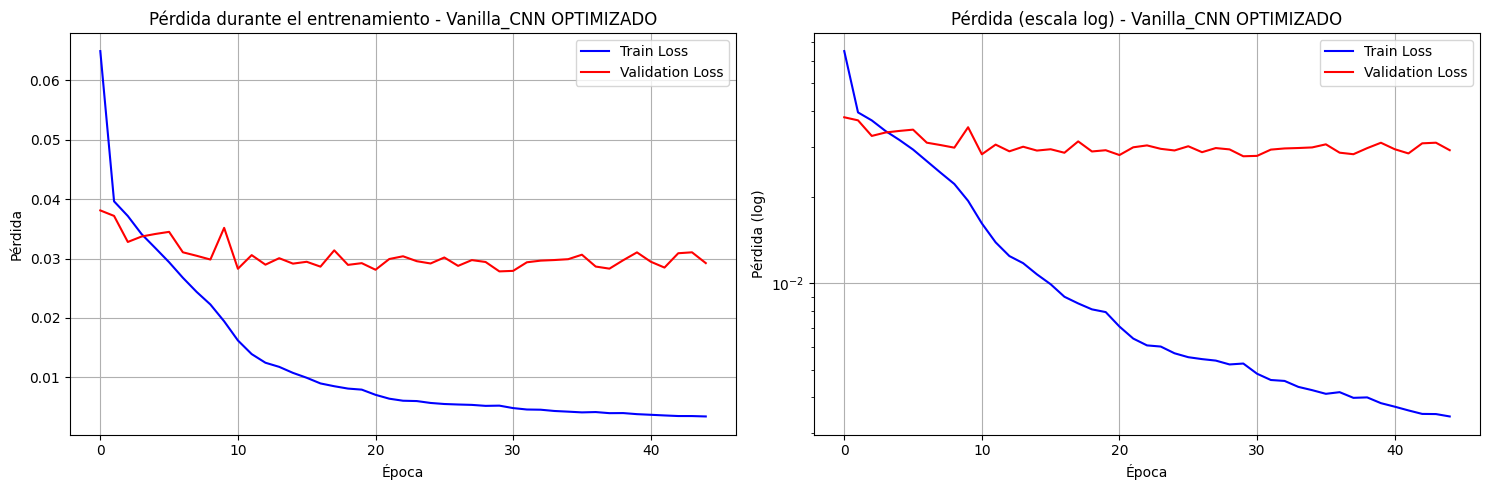

📊 Resultados finales de Vanilla_CNN:
   - Pérdida final de entrenamiento: 0.0034
   - Pérdida final de validación: 0.0292
   - Mejor pérdida de validación: 0.0278


In [9]:
# Visualizar resultados del entrenamiento
plot_training_results(train_losses, val_losses)

print(f"📊 Resultados finales de {MODEL_NAME}:")
print(f"   - Pérdida final de entrenamiento: {train_losses[-1]:.4f}")
print(f"   - Pérdida final de validación: {val_losses[-1]:.4f}")
print(f"   - Mejor pérdida de validación: {min(val_losses):.4f}")


## 5. Evaluación


In [10]:
# Evaluar
print(f"🔍 Evaluando el modelo {MODEL_NAME} ...")
evaluation_results = evaluate_model_detailed(model, val_loader, device)
print_evaluation_results(evaluation_results)


🔍 Evaluando el modelo Vanilla_CNN ...
\n📊 Resultados de evaluación - Vanilla_CNN OPTIMIZADO:
   - MSE: 0.007307
   - RMSE: 0.085483
   - MAE: 0.062028
\n📏 Error absoluto medio por coordenada:
   - x_left: 0.060135
   - y_top: 0.059996
   - x_right: 0.063905
   - y_bottom: 0.064075
\n📈 Error promedio: 6.20% de las coordenadas normalizadas


## 6. Predicciones evaluación


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


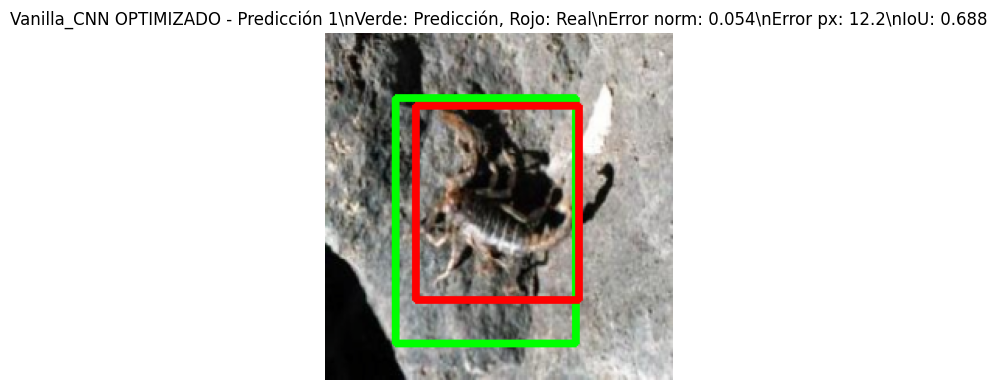

In [12]:
visualize_predictions(model, val_dataset, num_samples=1, device=device)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


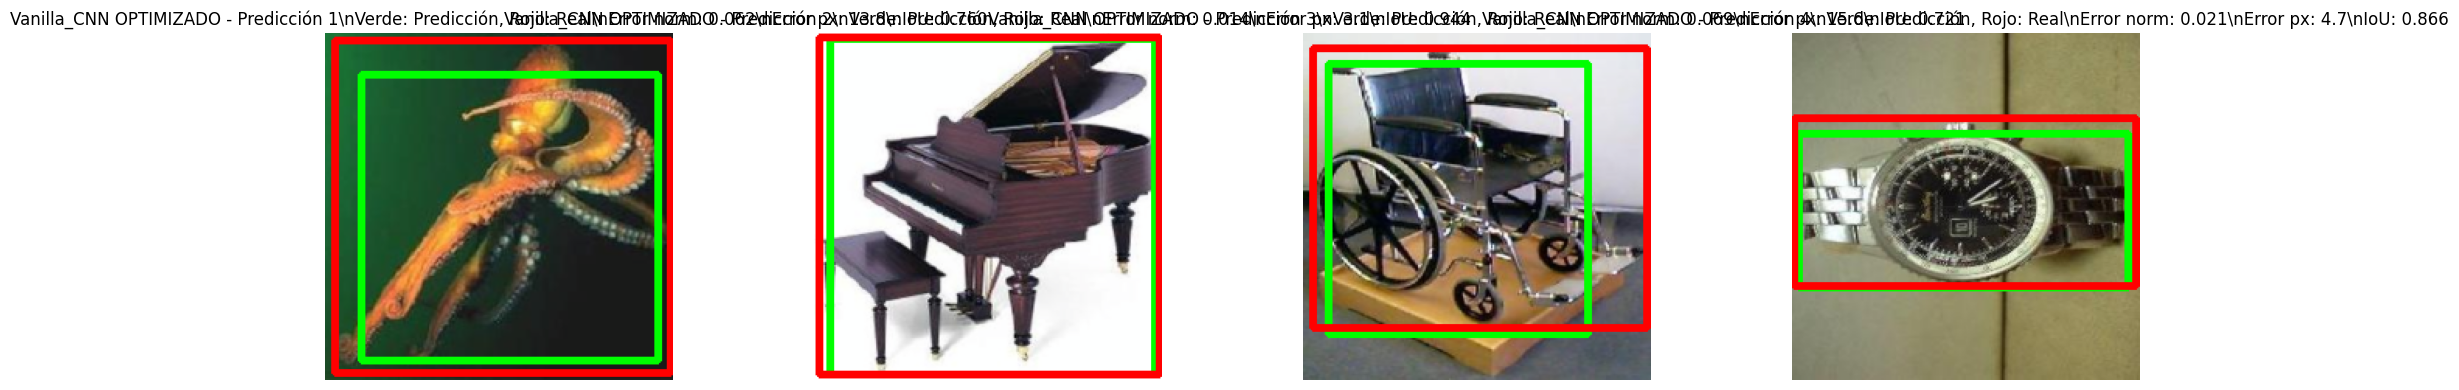

In [13]:
visualize_predictions(model, val_dataset, num_samples=4, device=device)

In [14]:
# Guardar modelo
from datetime import datetime
import os

model_dir = "models"
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
model_name_file = f"{MODEL_NAME.lower().replace('-', '_')}_bounding_box_model_{timestamp}.pth"
model_path = os.path.join(model_dir, model_name_file)

torch.save({
    'model_state_dict': model.state_dict(),
    'model_architecture': 'VanillaBoundingBoxRegressor',
    'backbone': 'None',
    'num_classes': 4,
    'epochs_trained': len(train_losses),
    'final_train_loss': train_losses[-1],
    'final_val_loss': val_losses[-1],
    'best_val_loss': min(val_losses),
    'evaluation_results': evaluation_results,
    'optimizations_applied': [
        'Formato correcto de coordenadas [y1,y2,x1,x2] -> [x1,y1,x2,y2]',
        'Normalización correcta',
        'Visualización completamente corregida',
        'ENTRENAMIENTO COMPLETO - Todos los parámetros',
        'Arquitectura mejorada con más capas',
        'Configuración de entrenamiento optimizada',
        'Learning rate optimizado (5e-4)',
        'Más épocas (40) para entrenamiento completo',
        'Más paciencia (12)',
        'Gradient clipping',
        'AdamW optimizer',
        'Cosine annealing scheduler'
    ],
    'parameters_info': {
        'total_params': total_params,
        'trainable_params': trainable_params,
        'training_type': 'full_training'
    }
}, model_path)

print(f"💾 Modelo {MODEL_NAME} guardado exitosamente:")
print(f"   - Archivo: {model_path}")
print(f"   - Épocas entrenadas: {len(train_losses)}")
print(f"   - Mejor pérdida de validación: {min(val_losses):.4f}")
print(f"   - Error promedio: {evaluation_results['mae'] * 100:.2f}%")
print(f"   - Parámetros entrenables: {trainable_params:,} (100%)")


💾 Modelo Vanilla_CNN guardado exitosamente:
   - Archivo: models/vanilla_cnn_bounding_box_model_20251027_193241.pth
   - Épocas entrenadas: 45
   - Mejor pérdida de validación: 0.0278
   - Error promedio: 6.20%
   - Parámetros entrenables: 58,051,332 (100%)
